In [1]:
# loading cleaned weather dataset
import pandas as pd
import numpy as np
df = pd.read_csv('cleaned_data.csv')
df.head()

,datetime,city,humidity,pressure,temperature,wind_speed,wind_direction,latitude,longitude,weather
0,2017-01-01 00:00:00,Portland,96.0,1017.0,35.582,3.0,160.0,45.523449,-122.676208,foggy
1,2017-01-01 01:00:00,Portland,96.0,1016.0,35.852,2.0,200.0,45.523449,-122.676208,rainy
2,2017-01-01 02:00:00,Portland,99.0,1015.0,35.600,3.0,221.0,45.523449,-122.676208,foggy
3,2017-01-01 03:00:00,Portland,99.0,1014.0,35.312,2.0,170.0,45.523449,-122.676208,rainy
4,2017-01-01 04:00:00,Portland,99.0,1013.0,34.826,1.0,210.0,45.523449,-122.676208,rainy


In [2]:
# filtering denver data
denver_df = df[df['city'] == 'Denver']
# dropping city as only denver data is present and resetting the index
denver_df = denver_df.drop(columns = ['city']).reset_index(drop=True)
denver_df

,datetime,humidity,pressure,temperature,wind_speed,wind_direction,latitude,longitude,weather
0,2017-01-01 00:00:00,36.0,1006.0,37.814,3.0,10.0,39.739151,-104.984703,clear
1,2017-01-01 01:00:00,36.0,1006.0,29.174,2.0,340.0,39.739151,-104.984703,cloudy
2,2017-01-01 02:00:00,68.0,1008.0,28.418,1.0,189.0,39.739151,-104.984703,clear
3,2017-01-01 03:00:00,79.0,1008.0,26.924,1.0,210.0,39.739151,-104.984703,clear
4,2017-01-01 04:00:00,79.0,1008.0,25.142,1.0,189.0,39.739151,-104.984703,clear
...,...,...,...,...,...,...,...,...,...
7988,2017-11-29 20:00:00,18.0,1016.0,61.538,3.0,310.0,39.739151,-104.984703,cloudy
7989,2017-11-29 21:00:00,12.0,1018.0,63.590,6.0,300.0,39.739151,-104.984703,clear
7990,2017-11-29 22:00:00,15.0,1018.0,61.808,3.0,340.0,39.739151,-104.984703,clear
7991,2017-11-29 23:00:00,28.0,1020.0,60.836,1.0,10.0,39.739151,-104.984703,foggy


In [3]:
# creating a function to label data based on weather description
def weather_labels(description):
    if 'clear' in description:
        return 'clear'
    else:
        return 'not clear'

In [4]:
# applying weather_labels function
denver_df['weather'] = denver_df['weather'].apply(weather_labels)
denver_df.weather.value_counts()

weather
clear        4161
not clear    3832
Name: count, dtype: int64

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 
from sklearn.metrics import confusion_matrix

In [6]:
# instantiating the decision tree with entropy criterion and best splitter
MyDT1 = DecisionTreeClassifier(criterion='entropy', 
                            splitter='best',  
                             )

# instantiating the decision tree with entropy criterion and random splitter
MyDT2 = DecisionTreeClassifier(criterion='entropy', 
                            splitter='random', 
                             )

# instantiating the decision tree with gini criterion and best splitter
MyDT3 = DecisionTreeClassifier(criterion='gini',
                            splitter='best',  
                             )

# instantiating the decision tree with gini criterion and random splitter
MyDT4 = DecisionTreeClassifier(criterion='gini', 
                            splitter='random', 
                             )

In [7]:
# checking data types
denver_df.dtypes

datetime           object
humidity          float64
pressure          float64
temperature       float64
wind_speed        float64
wind_direction    float64
latitude          float64
longitude         float64
weather            object
dtype: object

In [8]:
# converting weather into category type
denver_df['weather'] = denver_df['weather'].astype('category')
denver_df.dtypes

datetime            object
humidity           float64
pressure           float64
temperature        float64
wind_speed         float64
wind_direction     float64
latitude           float64
longitude          float64
weather           category
dtype: object

In [9]:
denver_df.to_csv('classificationdata.csv', index=False)

In [10]:
denver_df.head()

,datetime,humidity,pressure,temperature,wind_speed,wind_direction,latitude,longitude,weather
0,2017-01-01 00:00:00,36.0,1006.0,37.814,3.0,10.0,39.739151,-104.984703,clear
1,2017-01-01 01:00:00,36.0,1006.0,29.174,2.0,340.0,39.739151,-104.984703,not clear
2,2017-01-01 02:00:00,68.0,1008.0,28.418,1.0,189.0,39.739151,-104.984703,clear
3,2017-01-01 03:00:00,79.0,1008.0,26.924,1.0,210.0,39.739151,-104.984703,clear
4,2017-01-01 04:00:00,79.0,1008.0,25.142,1.0,189.0,39.739151,-104.984703,clear


In [11]:
# In Python - the Decision Trees work ONLY on quantitative data
x = denver_df.drop(columns=['datetime', 'latitude', 'longitude', 'weather'])
y = denver_df['weather']

In [12]:
from sklearn.model_selection import train_test_split
# creating disjoint train and test data
# using stratified sampling to ensure that each class is represented proportionally in both sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [13]:
y_train.value_counts()

weather
clear        3320
not clear    3074
Name: count, dtype: int64

In [14]:
y_test.value_counts()

weather
clear        841
not clear    758
Name: count, dtype: int64

In [44]:
print('x_train:', '\n')
print(x_train.head(), '\n')

print('y_train:', '\n')
print(y_train.head(), '\n')

print('x_test:', '\n')
print(x_test.head(), '\n')

print('y_test:', '\n')
print(y_test.head(), '\n')


x_train: 

      humidity  pressure  temperature  wind_speed  wind_direction
3336      80.0    1020.0       39.182         5.0            20.0
517       73.0    1011.0       28.130         3.0           291.0
1385      22.0    1003.0       40.622        10.0           200.0
5045      64.0    1027.0       66.362         1.0           201.0
1929      75.0    1018.0       43.070         6.0           340.0 

y_train: 

3336    not clear
517         clear
1385    not clear
5045    not clear
1929        clear
Name: weather, dtype: category
Categories (2, object): ['clear', 'not clear'] 

x_test: 

      humidity  pressure  temperature  wind_speed  wind_direction
3015      30.0    1016.0       65.912         4.0           190.0
599       36.0    1015.0       30.398         2.0            60.0
415       56.0    1016.0       25.016         2.0           270.0
1708      51.0    1022.0       39.992         3.0            30.0
3927      29.0    1012.0       60.224         1.0           240.0 

y_

In [15]:
# training the model
MyDT1 = MyDT1.fit(x_train, y_train)
MyDT2 = MyDT2.fit(x_train, y_train)
MyDT3 = MyDT3.fit(x_train, y_train)
MyDT4 = MyDT4.fit(x_train, y_train)

In [16]:
# predicting the label on test data
y1_pred = MyDT1.predict(x_test)
y2_pred = MyDT2.predict(x_test)
y3_pred = MyDT3.predict(x_test)
y4_pred = MyDT4.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report
# calculating accuracy
accuracy1 = accuracy_score(y_test, y1_pred)
accuracy2 = accuracy_score(y_test, y2_pred)
accuracy3 = accuracy_score(y_test, y3_pred)
accuracy4 = accuracy_score(y_test, y4_pred)

print("Accuracy (criterion='entropy', splitter='best') =", accuracy1)
print("Accuracy (criterion='entropy', splitter='random') =", accuracy2)
print("Accuracy (criterion='gini', splitter='best') =", accuracy3)
print("Accuracy (criterion='gini', splitter='random') =", accuracy4)

Accuracy (criterion='entropy', splitter='best') = 0.6779237023139462
Accuracy (criterion='entropy', splitter='random') = 0.6472795497185742
Accuracy (criterion='gini', splitter='best') = 0.6716697936210131
Accuracy (criterion='gini', splitter='random') = 0.6497811131957474


In [18]:
# generating the tree viz
TREE_data = tree.export_graphviz(MyDT1, out_file=None,
                  feature_names=x.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data) 
graph.render("Tree_1") 

'Tree_1.pdf'

In [19]:
# generating the tree viz
TREE_data = tree.export_graphviz(MyDT2, out_file=None,
                  feature_names=x.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data) 
graph.render("Tree_2") 

'Tree_2.pdf'

In [20]:
# generating the tree viz
TREE_data = tree.export_graphviz(MyDT3, out_file=None,
                  feature_names=x.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data) 
graph.render("Tree_3") 

'Tree_3.pdf'

In [21]:
# generating the tree viz
TREE_data = tree.export_graphviz(MyDT4, out_file=None,
                  feature_names=x.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data) 
graph.render("Tree_4") 

'Tree_4.pdf'

In [22]:
MyDT1_cm = confusion_matrix(y_test, y1_pred)
MyDT2_cm = confusion_matrix(y_test, y2_pred)
MyDT3_cm = confusion_matrix(y_test, y3_pred)
MyDT4_cm = confusion_matrix(y_test, y4_pred)

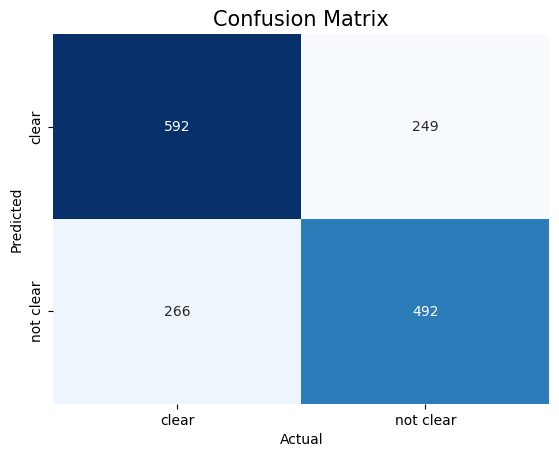

In [23]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

labels = y.unique()

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(MyDT1_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

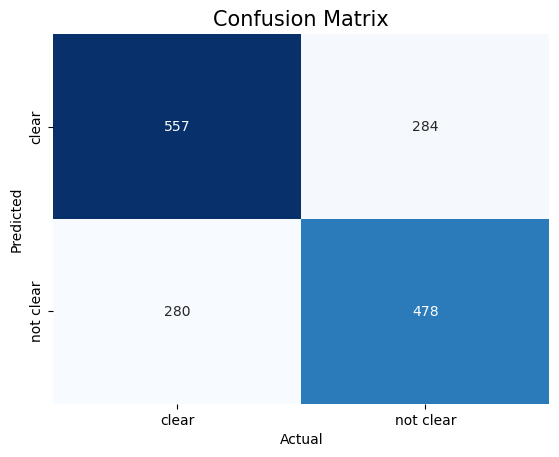

In [24]:
sns.heatmap(MyDT2_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

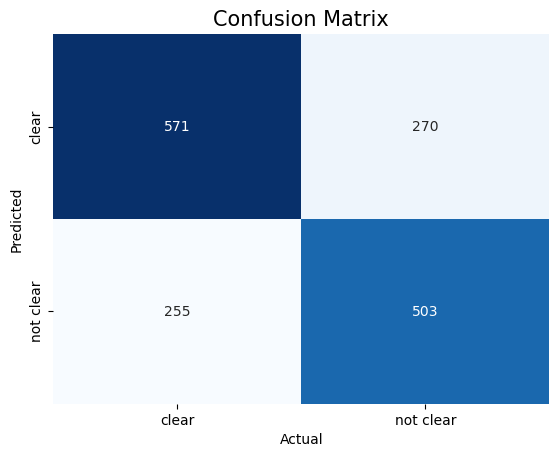

In [25]:
sns.heatmap(MyDT3_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

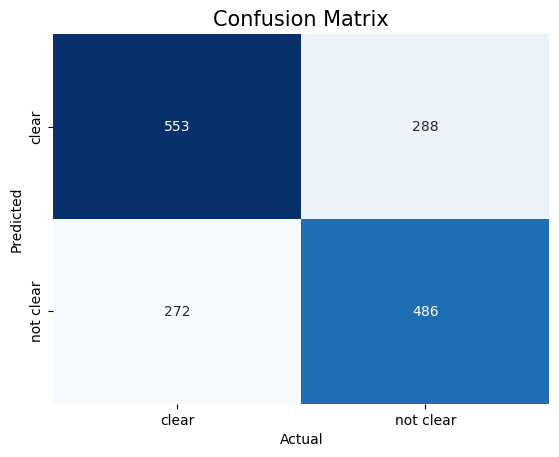

In [26]:
sns.heatmap(MyDT4_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [27]:
# checking the feature importance for each tree
feature_importances1 = MyDT1.feature_importances_
feature_importances2 = MyDT2.feature_importances_
feature_importances3 = MyDT3.feature_importances_
feature_importances4 = MyDT4.feature_importances_

In [28]:
feature_names = x.columns
# sorting the importance in descending order
feature_imp1 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances1})
feature_imp1 = feature_imp1.sort_values(by='Importance', ascending=False)
feature_imp1

,Feature,Importance
2,temperature,0.279265
0,humidity,0.239852
4,wind_direction,0.216191
1,pressure,0.174562
3,wind_speed,0.090129


In [29]:
# sorting the importance in descending order
feature_imp2 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances2})
feature_imp2 = feature_imp2.sort_values(by='Importance', ascending=False)
feature_imp2

,Feature,Importance
0,humidity,0.253229
4,wind_direction,0.239320
2,temperature,0.201817
1,pressure,0.193495
3,wind_speed,0.112139


In [30]:
# sorting the importance in descending order
feature_imp3 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances3})
feature_imp3 = feature_imp3.sort_values(by='Importance', ascending=False)
feature_imp3

,Feature,Importance
2,temperature,0.268017
0,humidity,0.262983
4,wind_direction,0.215708
1,pressure,0.165605
3,wind_speed,0.087687


In [31]:
# sorting the importance in descending order
feature_imp4 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances4})
feature_imp4 = feature_imp4.sort_values(by='Importance', ascending=False)
feature_imp4

,Feature,Importance
0,humidity,0.271406
4,wind_direction,0.225760
2,temperature,0.213350
1,pressure,0.180622
3,wind_speed,0.108863
